# Here we demonstrate how to do the grid method

Note: This should work 'out of the box' only after the field data has been processed and pickled. To process the field data, see ???

# Basic Setup

In [1]:
import sys
import pandas as pd

#you will need to change the basedir to match the location on your machine
basedir='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/'

# The Beam 
## load beam libs

In [2]:
path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import get_df_tracker

## load beam data

In [3]:
df_tracker = get_df_tracker()
mask12 = (df_tracker["Station"] == 'station12')
df_12 = df_tracker[mask12].copy()
df_12.head()

,index,radial,vertical,counts,Station
0,2,-59.0,-59.0,0.0,station12
1,3,-59.0,-57.0,0.0,station12
2,4,-59.0,-55.0,0.0,station12
3,5,-59.0,-53.0,0.0,station12
4,6,-59.0,-51.0,0.0,station12


# The field

## load grid method libs

In [4]:
path = basedir + 'field_info'
sys.path.insert(0,path)
from field_grid import *

## load field data
Here you retreive the dataframe with the relevant field info
(As mentioned, you need to have processed and pickled the field data already for this step)

In [5]:
path = basedir + 'field_info/data/run1/all_multipoles/run1_v00/'
path = path + '60Hr_vals_uncertainties_3956-3997.pkl'
df = pd.read_pickle(path)
df.head()

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:01  838.099  0.065085 -0.079133  0.057698   
      0      2018-04-22 13:14:03  838.078  0.065085 -0.087916  0.057698   
      0      2018-04-22 13:14:05  838.090  0.065086 -0.088702  0.057699   
      0      2018-04-22 13:14:07  838.107  0.065086 -0.099699  0.057699   
      0      2018-04-22 13:14:09  838.111  0.065086 -0.102604  0.057699   

                    SQ       eSQ       NS       eNS        SS  ...        SO  \
run   subrun                                                   ...             
15921 0       0.182330  0.056887 -1.17145  0.058112  0.303779  ...  0.266763   
      0       0.181335  0.056887 -1.17794  0.058112  0.303780  ...  0.266763   
      0       0.179374  0.056887 -1.17500  0.058112  0.303781  ...  0.266763   
      0       0.180806  0.056888 -1.17138  0.058112  0.303781  ...  0.266763   
      0       0.181792  0.056888 -1.16972  0.058112  0.303782  ...  0.266763   

                   eSO        ND      eND       SD       eSD  ctags  \
run   subrun                                                          
15921 0       0.043889  0.069171  0.04386 -1.39197  0.043907      0   
      0       0.043889  0.069171  0.04386 -1.39197  0.043907      0   
      0       0.043889  0.069171  0.04386 -1.39197  0.043907      0   
      0       0.043889  0.069171  0.04386 -1.39197  0.043907      0   
      0       0.043889  0.069171  0.04386 -1.39197  0.043907      0   

                      start_time            end_time  poor_ctags  
run   subrun                                                      
15921 0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  

[5 rows x 23 columns]

## Calculate field quantities
Calculate the ctag averaged value of all the multipoles

In [6]:
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags,
    (df["SS"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["NO"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags,
    (df["ND"]*df["ctags"]).sum()/total_ctags]
b

[837.7642600991675,
 -0.10057707978851607,
 0.252993670910658,
 -1.2046715662660914,
 0.3380052596425491,
 0.008032805835361366,
 0.008032805835361366,
 0.06915686581228143,
 0.06915686581228143]

Now calculate the 'field grid'

In [7]:
df_field_grid = get_field_grid(b)
df_field_grid.head()

,x,y,B
0,-59.0,-59.0,837.909060
1,-59.0,-57.0,837.847358
2,-59.0,-55.0,837.785029
3,-59.0,-53.0,837.722078
4,-59.0,-51.0,837.658516


The field grid look like:

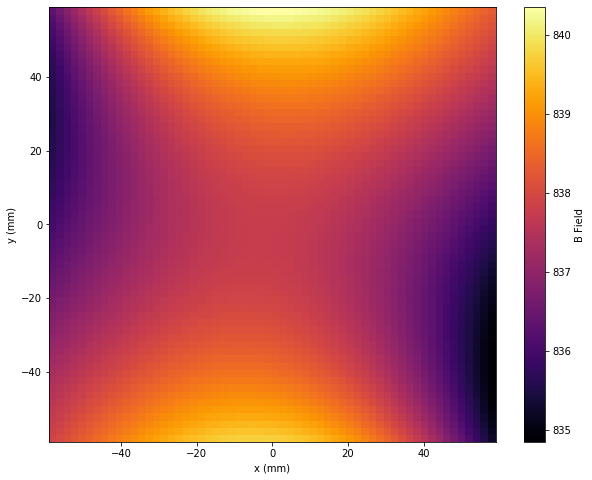

In [8]:
fig = plot_field(df_field_grid)
fig

# Finally, calculate < B >
it's just a weighted average

In [9]:
grid_result = (df_12['counts']*df_field_grid['B']).sum()/(df_12['counts'].sum())
grid_result

837.6214149088376

There you have it!